In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bioverse-hackathon-a/sample_submission.csv
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_311474891537523_10000518.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_334794925918542_1000007A.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_243443851199595_10000648.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_143146704649874_1000078B.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_277012924071188_100007D8.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_314462773124266_10000837.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_527889921141576_10000281.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_252924918682013_10000279.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_216583765798667_10000267.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_530797629198321_100002DA.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_277012924071188_100007D7.png
/kaggle/input/bioverse-hackathon-a/test/BAHEYA_593738677445146_10000104.png
/kaggle/input/bioverse-hackatho

In [3]:
!pip install pydicom

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet


target_shape = (200, 200)


import plotly.express as px

from PIL import Image

from scipy.stats import mode, skew

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import imageio
import skimage
import scipy.ndimage as ndi
sns.set_style('darkgrid')
sns.set_color_codes('bright')
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , Sequential


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
base = "../input/bioverse-hackathon-a/train/"

In [6]:
os.path.join(base,'/normal/')

'/normal/'

In [7]:
classes = []
imgs = []
photos=[]
for folder in os.listdir(base):
    folder_path = os.path.join(base, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        for img in os.listdir(file_path):
            img_path = os.path.join(file_path,img)
            imgs.append(img_path)
            photos.append(cv2.imread(img_path))
            classes.append(folder)

In [8]:
df = pd.DataFrame([imgs,classes]).T

In [9]:
df

,0,1
0,../input/bioverse-hackathon-a/train/normal/BAH...,normal
1,../input/bioverse-hackathon-a/train/normal/BAH...,normal
2,../input/bioverse-hackathon-a/train/normal/BAH...,normal
3,../input/bioverse-hackathon-a/train/normal/BAH...,normal
4,../input/bioverse-hackathon-a/train/normal/BAH...,normal
...,...,...
371,../input/bioverse-hackathon-a/train/beneign/BA...,beneign
372,../input/bioverse-hackathon-a/train/beneign/BA...,beneign
373,../input/bioverse-hackathon-a/train/beneign/BA...,beneign
374,../input/bioverse-hackathon-a/train/beneign/BA...,beneign


In [10]:
def preprocess_img(img):
    resized = cv2.resize(img, (224,224))
    eq_img = skimage.exposure.equalize_adapthist(resized)
    return eq_img

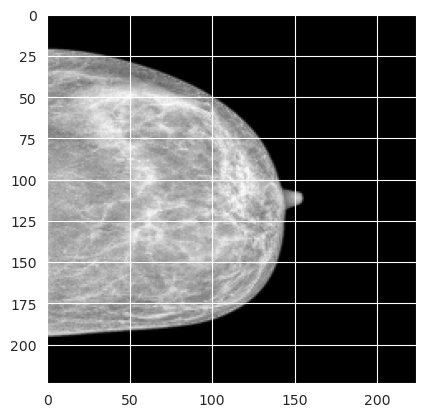

In [11]:
plt.imshow(preprocess_img(photos[2]))

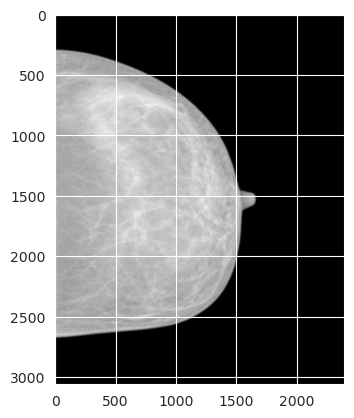

In [12]:
plt.imshow(photos[2])

In [13]:
preprocessed_images = []
for i in photos:
    preprocessed_images.append(preprocess_img(i))

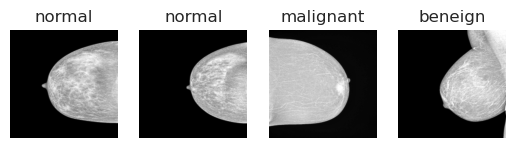

In [14]:
fig , axes = plt.subplots(1,4)
for i in range(len(axes)):
    axes[i].imshow(preprocessed_images[i*95])
    axes[i].set_title(classes[i*95])
    axes[i].axis('off')

In [15]:
# model = Sequential()

# # Conv 01 Layer
# model.add(layers.Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
# model.add(layers.BatchNormalization())



# # Conv 02 Layer
# model.add(layers.Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
# model.add(layers.BatchNormalization())


# # Conv 03 Layer
# model.add(layers.Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
# model.add(layers.BatchNormalization())


# # Conv 04 Layer
# model.add(layers.Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
# model.add(layers.BatchNormalization())



# # Conv 05 Layer
# model.add(layers.Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))

# model.add(layers.MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
# model.add(layers.BatchNormalization())


# # Flatten Layer
# model.add(layers.Flatten())


# # Dense 01
# model.add(layers.Dense(4096, activation="relu"))
# model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())


# # Dense 02
# model.add(layers.Dense(4096, activation="relu"))
# model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())


# # Dense 03
# model.add(layers.Dense(1000, activation="relu"))
# model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())


# # Final Layer
# model.add(layers.Dense(3, activation="softmax"))

In [16]:
labels_ohe = pd.get_dummies(df[1])

In [17]:
y=np.array(labels_ohe)
X= np.array(preprocessed_images)

In [18]:
# type(preprocessed_images)

In [19]:
x_train,x_val, y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [20]:
# model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
# model.fit(x_train,y_train,epochs=40)

In [22]:
resnet =  ResNet50(input_shape = (224,224,3) ,include_top=False,weights='imagenet')

In [23]:
for layer in resnet.layers:
    layer.trainable = False

In [32]:
z = layers.Flatten()(resnet.output)
z = layers.Dense(256,activation='relu')(z)
z_output = layers.Dense(3,activation='softmax')(z)

resnet_model = tf.keras.models.Model(inputs=resnet.input , outputs = z_output)

resnet_model.compile(optimizer ='adamax', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [33]:
resnet_model.fit(x_train,y_train,epochs=35)

Epoch 1/35
10/10 [==============================] - 5s 58ms/step - loss: 18.0776 - accuracy: 0.3400
Epoch 2/35
10/10 [==============================] - 1s 58ms/step - loss: 8.7151 - accuracy: 0.4233
Epoch 3/35
10/10 [==============================] - 1s 61ms/step - loss: 3.2544 - accuracy: 0.4167
Epoch 4/35
10/10 [==============================] - 1s 59ms/step - loss: 1.2763 - accuracy: 0.3700
Epoch 5/35
10/10 [==============================] - 1s 60ms/step - loss: 1.1362 - accuracy: 0.4167
Epoch 6/35
10/10 [==============================] - 1s 58ms/step - loss: 1.0866 - accuracy: 0.4233
Epoch 7/35
10/10 [==============================] - 1s 59ms/step - loss: 1.0941 - accuracy: 0.4500
Epoch 8/35
10/10 [==============================] - 1s 59ms/step - loss: 1.0518 - accuracy: 0.4433
Epoch 9/35
10/10 [==============================] - 1s 58ms/step - loss: 1.0730 - accuracy: 0.4100
Epoch 10/35
10/10 [==============================] - 1s 59ms/step - loss: 0.9999 - accuracy: 0.4833
Epoch 11

In [34]:
pred = resnet_model.predict(x_val)

3/3 [==============================] - 2s 60ms/step


In [35]:
preds = [np.argmax(i) for i in pred]

In [36]:
test_vals = [np.argmax(i) for i in y_val]

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(test_vals , preds))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        23
           1       0.40      0.20      0.27        20
           2       0.60      0.79      0.68        33

    accuracy                           0.55        76
   macro avg       0.51      0.50      0.49        76
weighted avg       0.53      0.55      0.53        76



In [ ]:
t_dir = os.listdir('../input/bioverse-hackathon-a/test')
test_imgs = []
for i in t_dir:
    test_imgs.append(cv2.imread(f"../input/bioverse-hackathon-a/test/{i}"))